In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

# Installing a special formatting package
import sys
!{sys.executable} -m pip install tabulate

plt.style.use('fivethirtyeight')


---
#### CS 260 Final Project - Fall 2023
---

# Title: EA Sports FC 24 Full Players Datatbase and Stats


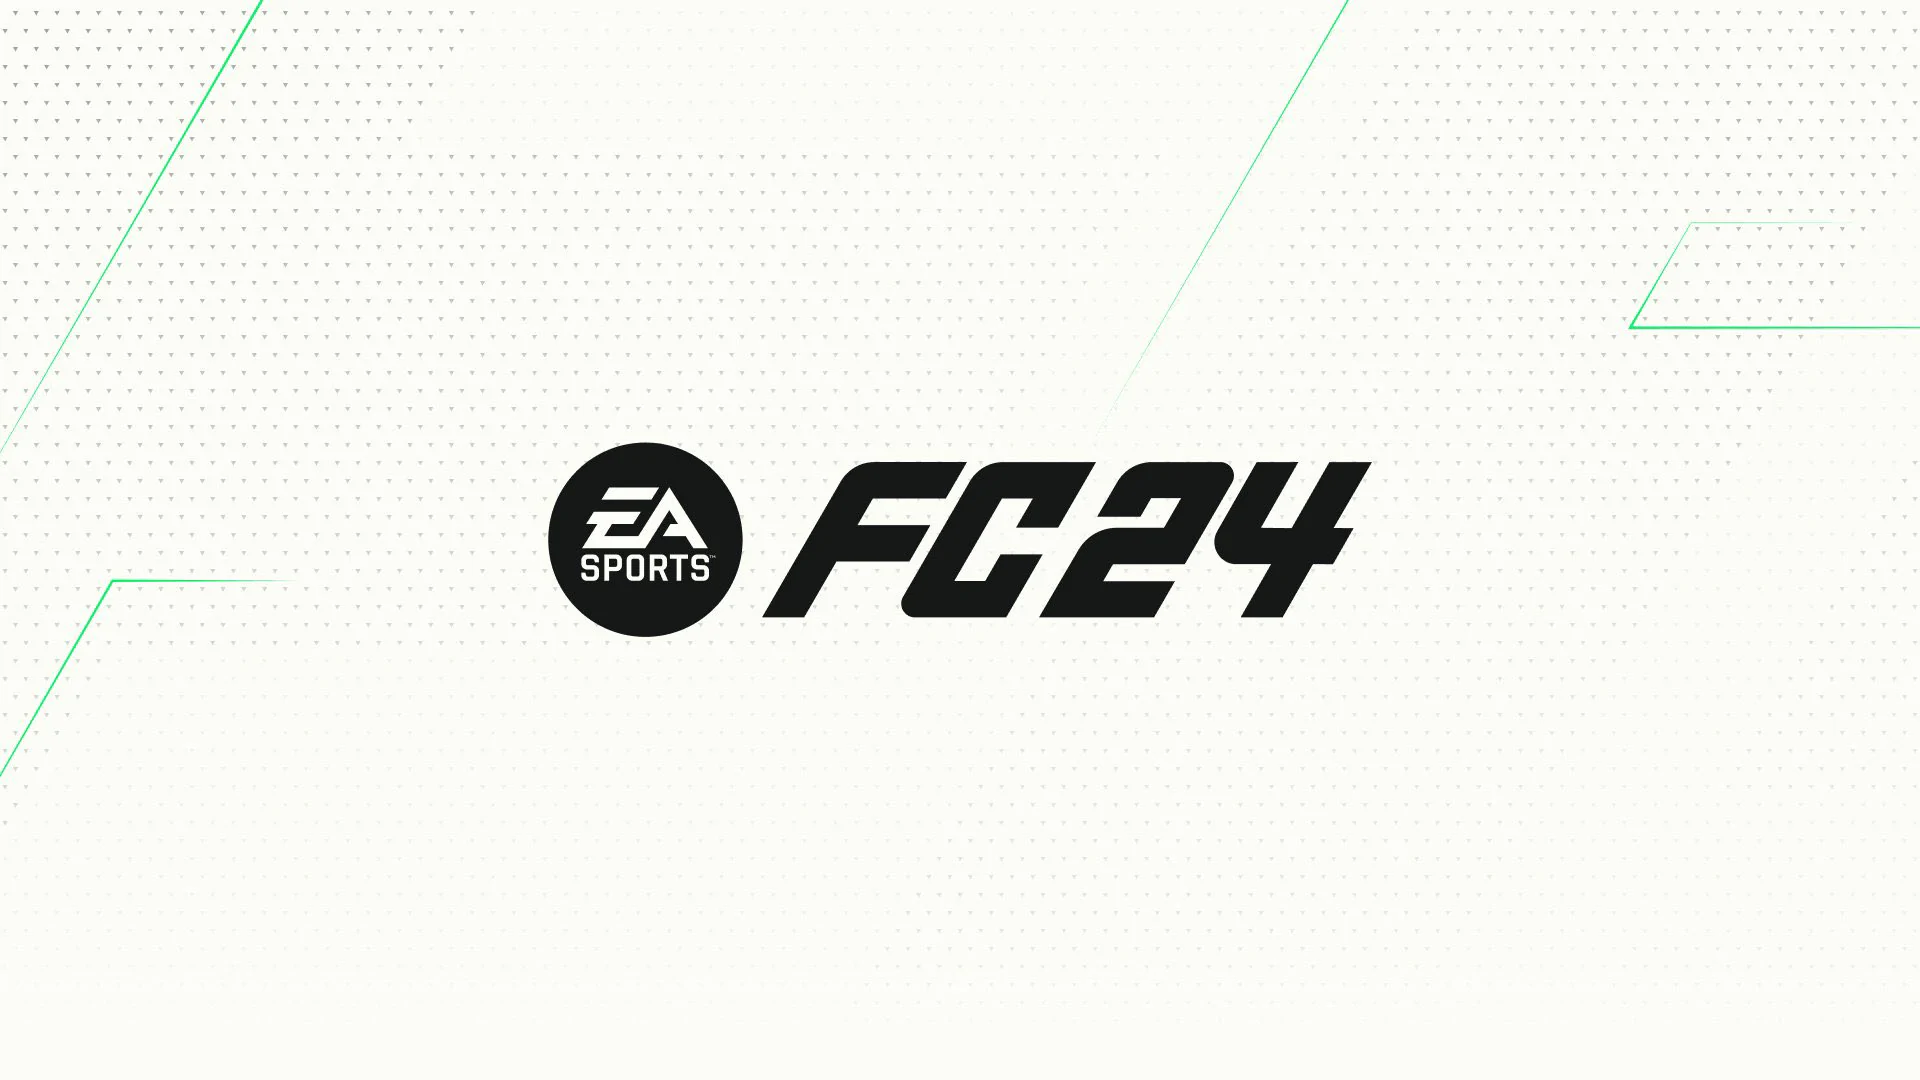

---

## 1. Introduction (ELEK)

For our project, we explored professional soccer player statistics from the video game EA Sports FC 24. Our data covers statistics from 17,326 players, including both men and women. We have 47 columns with information on player name, nation, club team, position, age, and varying player stats which we will discuss later.

Considering all of our data, we decided to focus our analysis on the following questions:

  1. What is the average age and pace of each position?
  2. How many players fall into each rating of weak foot?
  3. What are the top 5 highest stats (pace, shooting, passing, etc.) for each gender?
  4. Is there a correlation between club team and overall rating?
  5. Is there a correlation between composure and penalties for Argentinian males?

---

## 2. Data (ELEK)

The link to our data can be found at the following website:
  * https://www.kaggle.com/datasets/nyagami/fc-24-players-database-and-stats-from-easports

Google Drive folder with the CSV file we used:
  * https://drive.google.com/drive/folders/1noEwMbzMJM7tXjQlJqBRni0dv5ZXzNsX?usp=sharing

According to the creator of the dataset on Kaggle, the data found was directly obtained from the EA Sports website, which is public information. Python code was used to gather the information into a visual dataset. Then, different codes had to be used - one for males, one for females, one to merge the datasets, and one to save the output. Although the game is listed as 24 (2024), it was released in late September 2023, so the data could have been gathered from any point after that.


We believe the data is reliable because it is easy to check. All of the soccer players listed are based on the actual players in real life, so you can look their names up to see where they are from and what teams they play for. As far as the stats go, you can cross-check that information with the actual video game (EA Sports FC), which you can also look up. The dataset also contains a column that provides a URL to show where they found every player’s stats.

In [2]:
try:
    #Read in the needed csvs and create the DB
    players = pd.read_csv("all_players.csv")

    conn = sql.connect("all_players.db")
    players.to_sql('players', conn,  index = False)

except:
    print("Issue during DB creation/connection")

In [3]:
#Select all values from the included tables, one cell per table here.
sql_statement = """SELECT *
                   FROM players;"""

players = pd.read_sql_query(sql_statement, conn)
players

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,1476,Kateřina Vithová,Czech Republic,Slavia Praha,LM,17,54,60,50,54,...,66,42,Medium,Low,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,F,NaN
17322,1477,Lucie Bendová,Czech Republic,Slavia Praha,CB,18,52,58,25,40,...,61,49,Medium,Medium,Right,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,F,NaN
17323,1478,Aleigh Gambone,United States,Glasgow City FC,CM,23,52,60,55,53,...,51,51,High,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,F,NaN
17324,1479,Joy Lysser,Switzerland,FC Zürich,CM,19,52,61,52,46,...,60,56,Medium,Medium,Left,3,2,https://www.ea.com/games/ea-sports-fc/ratings/...,F,NaN


### 2.1 Variables Explained (JUSTIN)

---

## 3. Analysis

### Q1 (ELEK): What is the average age and pace of each position?

In [4]:
sql_statement = """SELECT DISTINCT(Position), AVG(age) AS avg_age, AVG(Pace) AS avg_pace, Gender
                   FROM players
                   GROUP BY Position
                   HAVING Gender = 'M'
                   ORDER BY avg_age DESC
                   """

position_results = pd.read_sql_query(sql_statement, conn)
position_results

,Position,avg_age,avg_pace,Gender
0,GK,26.612705,65.926742,M
1,CB,26.422301,59.714835,M
2,CF,26.378151,75.554622,M
3,CDM,26.310224,61.928571,M
4,RB,25.848430,73.229596,M
5,ST,25.844415,70.547153,M
6,RWB,25.691228,73.824561,M
7,LB,25.618916,72.863177,M
8,LWB,25.550781,73.648438,M
9,CM,25.376703,66.189760,M


(22.0, 79.0)

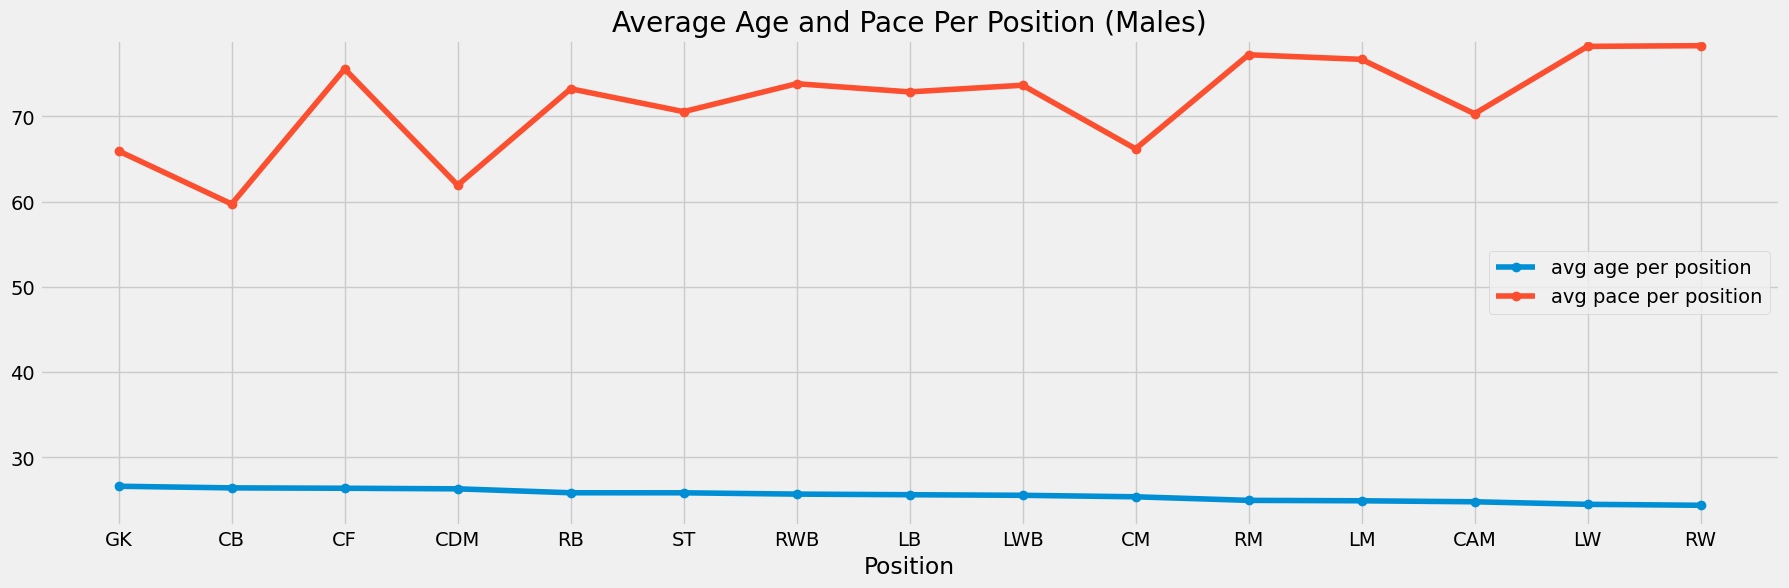

In [5]:
plt.figure(figsize=(20,6))
plt.plot(position_results["Position"], position_results["avg_age"], label="avg age per position", marker = 'o')
plt.plot(position_results["Position"], position_results["avg_pace"], label="avg pace per position", marker = 'o')
plt.title('Average Age and Pace Per Position (Males)')
plt.xlabel('Position')
plt.legend()
plt.ylim(22, 79)

This visualization compares the average age and pace (how fast a player is) of a player per their respective position. The goal of this visualization was to discover any indications of the longevity of each position. I filtered the data to males because I follow male professional soccer more than females. I hypothesized that positions that require more pace would have a lower average age, which is why I included average pace in my query.

Except for center forward (CF), my hypothesis was mostly correct. The goalkeeper (GK) had the highest average age of about 27 and the third lowest pace of about 66. The right-wing (RW) and left-wing (LW) had the lowest average age of about 24 and the highest average pace of about 78. As the average age decreases, it is evident that the average pace increases as well. Even though the increase in pace is not linear, we understand that positions that require speed and agility tend to have younger players and vice versa. Professional soccer coaches can use this data to improve their teams. If they lack offensive ability, they should check the ages of their attacking players and look to replace them if they are older.

### Q2 (ELEK): How many players fall into each rating of weak foot?

In [6]:
sql_statement_2 = """
                  SELECT COUNT(0) AS number_of_players, "Weak foot" AS weak_foot, Gender
                  FROM players
                  WHERE Gender = 'M'
                  GROUP BY weak_foot
                  """

male_results = pd.read_sql_query(sql_statement_2, conn)
male_results

,number_of_players,weak_foot,Gender
0,125,1,M
1,3422,2,M
2,9668,3,M
3,2367,4,M
4,263,5,M


In [7]:
sql_statement_25 = """
                  SELECT COUNT(0) AS number_of_players, "Weak foot" AS weak_foot, Gender
                  FROM players
                  WHERE Gender = 'F'
                  GROUP BY weak_foot


                   """

female_results = pd.read_sql_query(sql_statement_25, conn)
female_results

,number_of_players,weak_foot,Gender
0,5,1,F
1,351,2,F
2,888,3,F
3,204,4,F
4,33,5,F


In [8]:
sql_statement_23 = """
                  SELECT COUNT(0) AS number_of_players, "Weak foot" AS weak_foot, position
                  FROM players
                  WHERE weak_foot = 5
                  GROUP BY position
                  ORDER BY number_of_players DESC
                   """

five_results = pd.read_sql_query(sql_statement_23, conn)
five_results

,number_of_players,weak_foot,Position
0,58,5,ST
1,44,5,CM
2,30,5,CAM
3,24,5,CB
4,19,5,RM
5,17,5,LW
6,17,5,LM
7,16,5,RW
8,16,5,RB
9,15,5,GK


Text(0, 0.5, 'Weak Foot Rating')

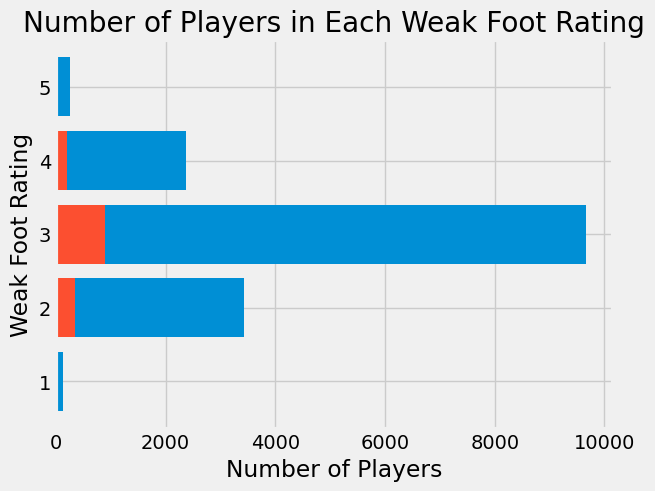

In [9]:
plt.barh(male_results['weak_foot'], male_results['number_of_players'])
plt.barh(female_results['weak_foot'], female_results['number_of_players'])
plt.title('Number of Players in Each Weak Foot Rating')
plt.xlabel('Number of Players')
plt.ylabel('Weak Foot Rating')

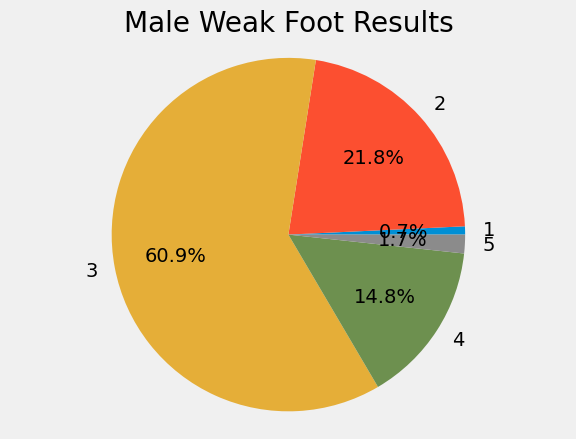

In [10]:
weak_foot_ratings = ['1', '2', '3', '4', '5']
weak_foot_count = [130, 3773, 10566, 2571, 296]

plt.pie(weak_foot_count, labels=weak_foot_ratings, autopct = '%.1f%%', pctdistance=.65)
plt.axis('equal')
plt.title('Male Weak Foot Results')
plt.show()

In [11]:
bins = np.arange(0, 11000, 100)

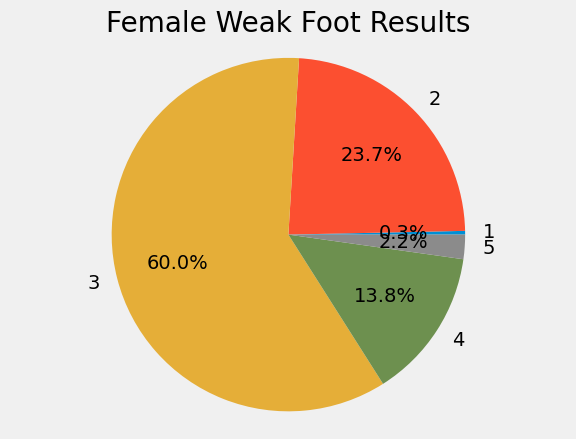

In [12]:
weak_foot_ratings = ['1', '2', '3', '4', '5']
weak_foot_count = [5, 351, 888, 204, 33]

plt.pie(weak_foot_count, labels=weak_foot_ratings, autopct = '%.1f%%', pctdistance=.65)
plt.axis('equal')
plt.title('Female Weak Foot Results')
plt.show()

The goal of the visualizations above is to help me gain an understanding of how strong a professional player’s weak foot (non-dominant kicking foot) is. The strength of a player's weak foot is decided by a ranking of one to five where five is the best. I made two queries - one for males and one for females, counting the number of players that fall into each ranking of weak foot.


According to the results, the most common ranking of weak foot for both males and females is three. A ranking of one is the lowest amongst both genders which makes sense because to be a professional soccer player you need to be strong with both feet. It is extremely uncommon to have a weak foot ranking of one as a professional soccer player. On the higher side of weak foot rankings, a ranking of five contains the second least amount of players across both genders. I ran an additional query to learn the positional breakdown of a five-rated weak foot. As I expected, the striker (ST) position had the most number of players with a five-rated weak foot of 55. This was across both genders and makes sense because a striker needs to be able to score goals with both feet.


In the bar chart, it is evident that there is more data for males than females because there are more male professional soccer players than females by a large margin. Professional soccer coaches could use this data if they are looking for improvements to their offense. The market for five rated weak-foot players is slim, so they would have more success searching for players in the four and three categories.

### Q3 (JUSTIN): What are the top 5 highest stats for each gender?

### Q4 (JUSTIN): Is there a correlation between club team and overall rating?

### Q5 (ELEK): Is there a correlation between composure and penalties for Argentinian males?

In [13]:
sql_statement_5 = """
                  SELECT Nation, Overall, Composure, Penalties, Gender
                  FROM players
                  WHERE Nation IN ("Argentina")
                  AND Gender = 'M'
                   """

Argentina_results = pd.read_sql_query(sql_statement_5, conn)
Argentina_results

,Nation,Overall,Composure,Penalties,Gender
0,Argentina,90,96,75,M
1,Argentina,87,86,74,M
2,Argentina,86,79,87,M
3,Argentina,85,86,76,M
4,Argentina,85,62,42,M
...,...,...,...,...,...
876,Argentina,59,55,62,M
877,Argentina,59,55,48,M
878,Argentina,59,47,51,M
879,Argentina,58,43,48,M


Text(0, 0.5, 'Stat Score')

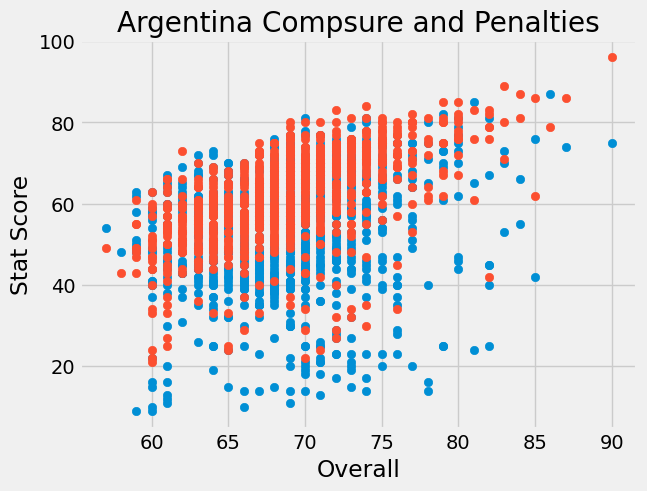

In [14]:
plt.scatter(Argentina_results['Overall'], Argentina_results['Penalties'])
plt.scatter(Argentina_results['Overall'], Argentina_results['Composure'])
plt.title("Argentina Compsure and Penalties")
plt.xlabel('Overall')
plt.ylabel('Stat Score')

In [15]:
corr_df = Argentina_results.corr()
r = corr_df["Composure"]["Penalties"]
r

<ipython-input-15-7458b6ba8d06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = Argentina_results.corr()


0.5740139092038548

In [16]:
sql_statement_5 = """
                  SELECT position, composure
                  FROM players
                  WHERE Gender = 'M'
                  GROUP BY position
                  ORDER BY composure DESC
                   """

Argentina_results = pd.read_sql_query(sql_statement_5, conn)
Argentina_results

,Position,Composure
0,CF,96
1,RW,90
2,ST,88
3,CM,88
4,CDM,85
5,LWB,83
6,LB,83
7,RB,82
8,CAM,82
9,RM,81


This last visualization is to find a possible correlation between the composure and penalty statistics for Argentinian male soccer players. I chose Argentina males because they recently won the 2022 World Cup after beating France in a penalty shootout. Throughout the entire World Cup tournament, Argentina was awarded the most penalty kicks out of any other team, scoring four out of five. In addition, their quarter-final and final games went to a penalty shootout, both of which Argentina won. What makes their team so clinical from the penalty spot?


Using the overall EAFC 24 rating as the x-axis, I graphed the composure and penalty stats for Argentina. Based on the graph, it is clear that the higher rated a player is, the better their penalty and composure stats are. Interestingly enough, Lionel Messi, captain and main penalty kick taker for Argentina, is the highest overall rated Argentinian player -- 90. He has the highest penalty stat total and one of the highest composure stat totals, which is why Argentina has been able to convert almost every penalty kick when he takes them.


The correlation between composure and penalties is a moderate positive correlation (.57), furthering the importance of their relationship. If a player is not composed, then you do not want them taking penalty kicks for your team. Taking penalty kicks is an extremely stress-inducing scenario, especially on the international level, so as a coach, it is important to find players who can remain calm and composed regardless of the situation. I ran an additional query to find what position is most composed and center forward (CF) was the highest with a score of 96. This makes sense because center forwards are constantly in goal-scoring situations, so they need to be able to retain their focus as they shoot the ball. Also because Messi is a CF and has one of the highest composure stats out of anyone in EAFC 24, it is logical the CF position would be rated the highest.

### Conclusion (JUSTIN)